# Easy to read bar charts

It's important to make plots that are easy to read. That often means ordering the elements of the plot in some logical manner. Below is an example of how to logically order different elements of a bar plot using ggplot2. 

This tutorial uses ggplot2 for the plotting (with viridis for colors), and dplyr/tidyr for maniputating the data. Here is the code to install and load those packages here in the notebook. 

In [18]:
options(warn = -1)

options(repos = c('http://ftp.heanet.ie/mirrors/cran.r-project.org/')) 

install.packages(c("ggplot2", "dplyr", "tidyr", "viridis", "ggthemes", "Cairo"))

library(dplyr)
library(tidyr)
library(ggplot2)
library(viridis)
library(ggthemes)

Installing packages into 'C:/Users/ddahly/Documents/R/win-library/3.3'
(as 'lib' is unspecified)


package 'Cairo' successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	C:\Users\ddahly\AppData\Local\Temp\RtmpakfFqO\downloaded_packages


# Data

For this bar plot example, we will create a simple dataset reflecting compositional data where all the elements, A though D, sum to 100% within each observation. You might encounter data like this while studying the mineral compostion of different rocks, or the types of bacteria living in the guts of different people. 

In [19]:
data <- data_frame(id = c(1:4),
                   A  = c(45, 65, 35, 55),
                   B  = c(10, 10, 10, 10),
                   C  = c(21, 22, 23, 20),
                   D  = 100 - A - B - C)

head(data)

Observations: 4
Variables: 5
$ id (int) 1, 2, 3, 4
$ A  (dbl) 45, 65, 35, 55
$ B  (dbl) 10, 10, 10, 10
$ C  (dbl) 21, 22, 23, 20
$ D  (dbl) 24, 3, 32, 15


For plotting with ggplot2, we need to gather (or reshape) the data as follows. 

In [20]:
data <- gather(data, type, value, A:D) %>%
        mutate(type = factor(type))

glimpse(data)

Observations: 16
Variables: 3
$ id    (int) 1, 2, 3, 4, 1, 2, 3, 4, 1, 2, 3, 4, 1, 2, 3, 4
$ type  (fctr) A, A, A, A, B, B, B, B, C, C, C, C, D, D, D, D
$ value (dbl) 45, 65, 35, 55, 10, 10, 10, 10, 21, 22, 23, 20, 24, 3, 32, 15


Using these data, now we can create a bar plot that shows the values of A:D for each observation.

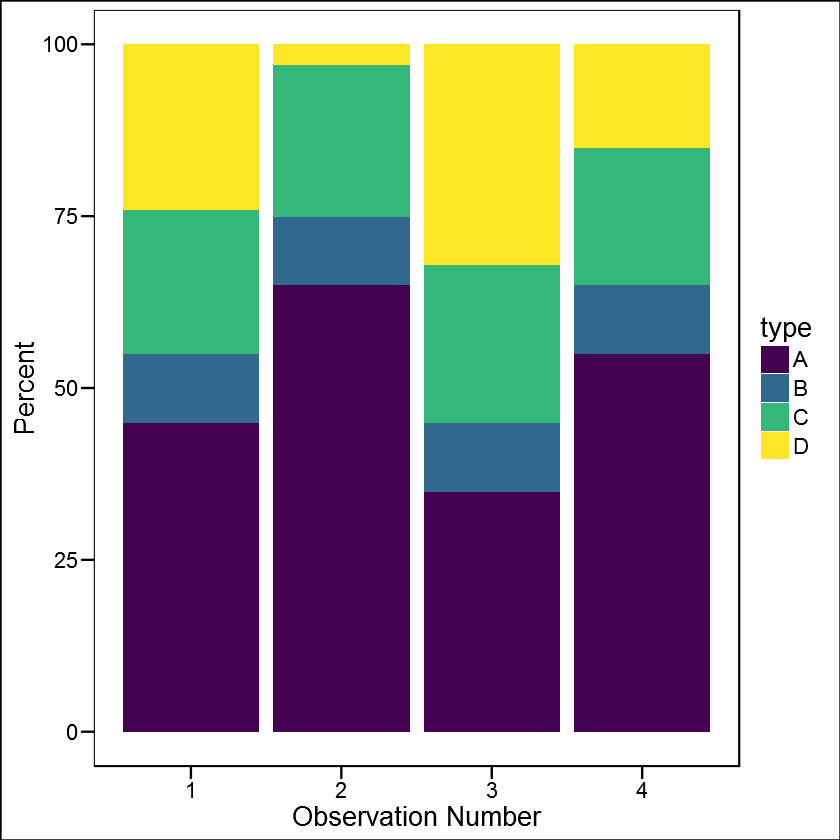

In [21]:
barplot <- function(data){
           x <- ggplot(data, aes(x = id, y = value, fill = type)) +
                  geom_bar(stat = "identity") +
                  scale_fill_viridis(discrete = TRUE) +
                  theme_base() +
                  xlab("Observation Number") +
                  ylab("Percent")
           print(x)
         }

barplot(data)

It's a nice enough plot, but there are a few ways to make it easier to read. The first is to logically order the different types (A:D) within each bar. To do this, we will calculate the mean value for each type across observations, and then order the types in descending order of these means by approrpiately arranging the rows of the dataframe.  

Observations: 16
Variables: 4
$ type       (fctr) A, A, A, A, C, C, C, C, D, D, D, D, B, B, B, B
$ mean.value (dbl) 50.0, 50.0, 50.0, 50.0, 21.5, 21.5, 21.5, 21.5, 18.5, 18...
$ id         (int) 1, 2, 3, 4, 1, 2, 3, 4, 1, 2, 3, 4, 1, 2, 3, 4
$ value      (dbl) 45, 65, 35, 55, 21, 22, 23, 20, 24, 3, 32, 15, 10, 10, 1...


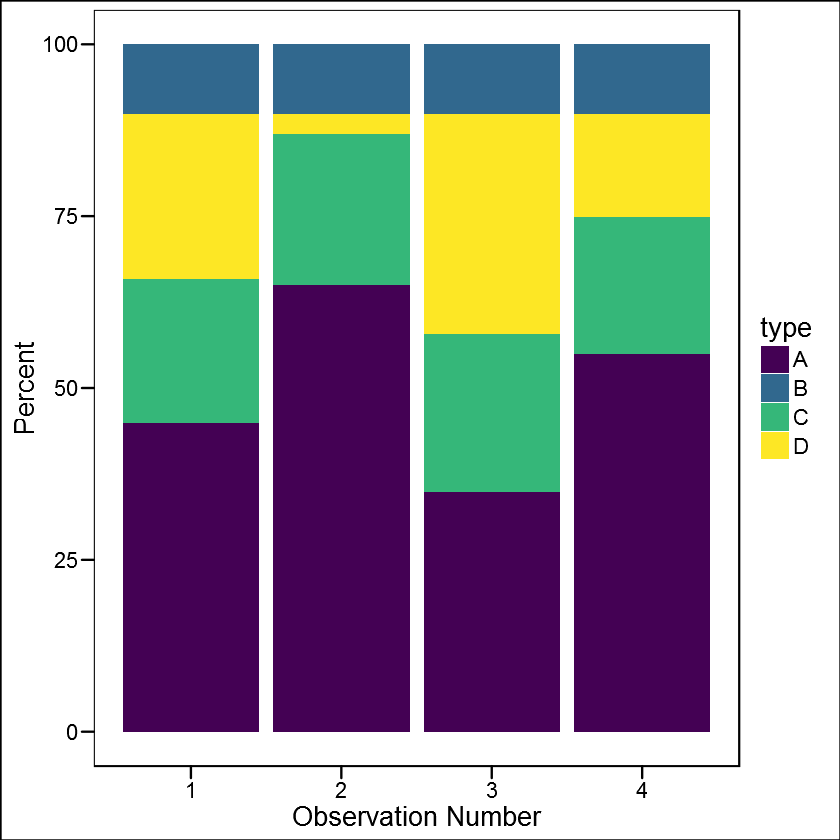

In [22]:
data.2 <- data %>%
            group_by(type) %>%
            summarise(mean.value = mean(value)) %>%   # Create a summary that you will use to order the types. 
            full_join(data, by = "type") %>%          # Merge that back into your datafeame. 
            arrange(desc(mean.value))                 # Arrange the dataframe based on that variable. 

with(data.2(table(type, mean.value))

barplot(data.2)

Below you can see that the order the dataframe is arranged in matches the bars above. 

In [23]:
select(data.2, type) %>% distinct()

,type
1,A
2,C
3,D
4,B


However, it would be nice if the order of the legend matched the order of the types in the bars. The legend order is controled by the order of the levels of the type variable. 

In [24]:
levels(data.2$type)

[1] "A" "B" "C" "D"

So to make everything match up, we simply need to reorder those levels as follows. 

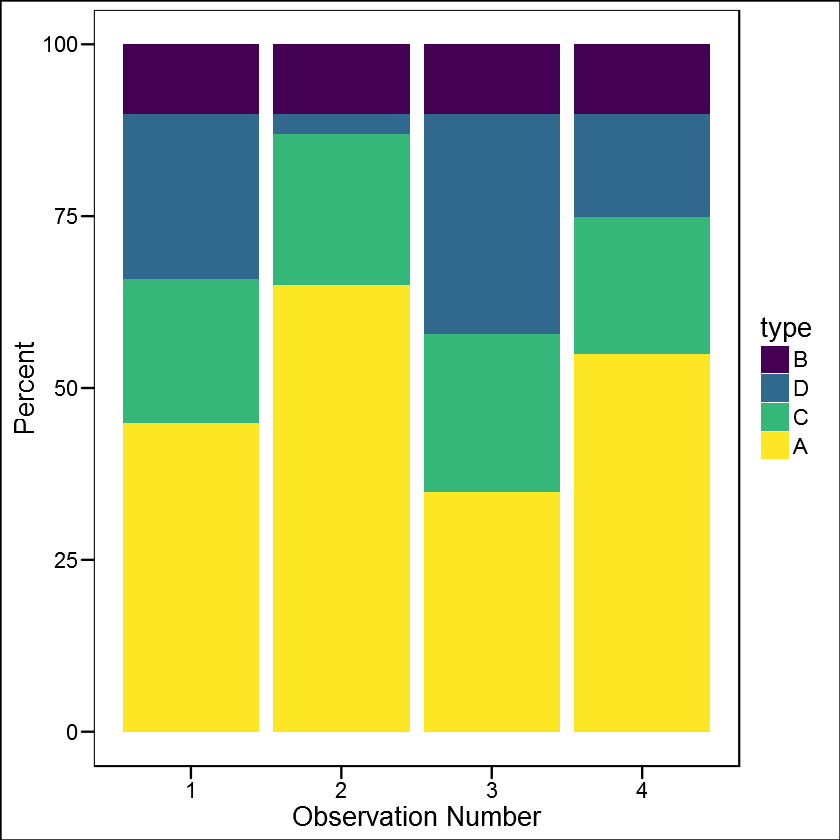

In [25]:
data.3 <- data %>%
            group_by(type) %>%
            summarise(mean.value = mean(value)) %>%
            full_join(data, by = "type") %>%
            arrange(desc(mean.value)) %>%
            mutate(type = reorder(type, mean.value))

barplot(data.3)

And now you can see that the order of the types is the same in both places, which should make it easier to use the legend. 

In [26]:
select(data.3, type) %>% distinct()

levels(data.3$type)

,type
1,A
2,C
3,D
4,B


[1] "B" "D" "C" "A"

Finally, we can order the observations in some way. I've decided to order them based on type A, which has the largest mean value across obvervations. To do this, turn the id variable in a factor that is ordered the way you want. 

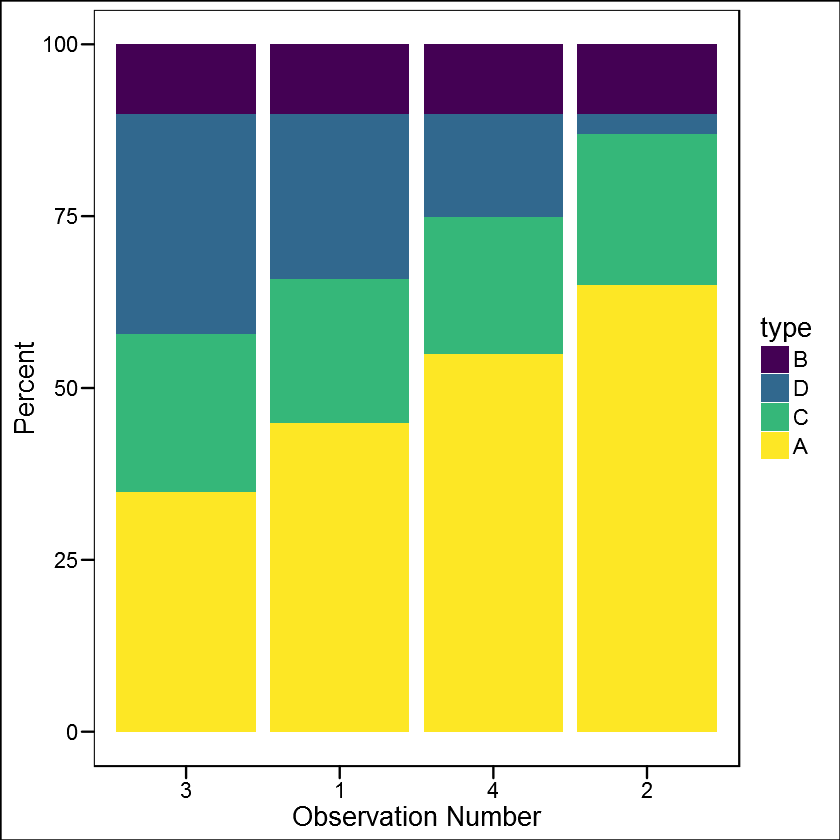

In [29]:
data.4 <- data.3 %>%
            filter(type == "A") %>%                    # Select the type to order the observations by
            mutate(id.order = value) %>%               # Capture each observations value for that type
            select(id, id.order) %>%
            full_join(data.3, by = "id") %>%           # Join that back into the dataset
            mutate(id = reorder(factor(id), id.order)) # Order the observations based on that value. 

barplot(data.4)

And viola. A much easier to read plot. 

In [ ]:
options(warn = 0)